The aim of this code is to compare experimental data with empirical corrrelation suggested by Gnienlinski and Konakov.
\
Shadwed error bar->
Ref. https://stackoverflow.com/questions/12957582/plot-yerr-xerr-as-shaded-region-rather-than-error-bars

In [48]:
#calcuration libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import csv
import time
timestr = time.strftime("%d.%m.%Y_%H.%M.%S.")
%matplotlib inline

In [49]:
# 取り出したい列を（0始まりで）指定する．
filename = './List_01.07.2019_16.31.58.csv'

In [50]:
Pr_m = 50
di = 12E-3
L = 2

In [51]:
di/L

0.006

### empirical correlation

In [52]:
Re_lam = np.linspace(1,2300,)
Re_turb = np.linspace(2300,10000,)
#Skin friction for laminar flow
Cf_lam = 16 / Re_lam
#Skin friction for turbulent flow
Cf_Konakov =  0.25 * (1.8*np.log10(Re_turb) - 1.5)**(-2) #3000 < Re < 5*10^5, Eq(4.17) German literature!!!!
Cf_Petukhov =  0.25 * (1.8*np.log10(Re_turb) - 1.64)**(-2) #3000 < Re < 5*10^5, Eq(8.21) 違う！！！！
Cf_Blasius_a = 0.079 * Re_turb**(-1/4) #Re < 2*10^4, Eq(8.20a)
Cf_Blasius_b = 0.046 * Re_turb**(-1/5) #Re < 2*10^4, Eq(8.20b)
#Cf_Zagarola = #Turbulence Eq(6.35)

File name: ./recf_pr50.pdf


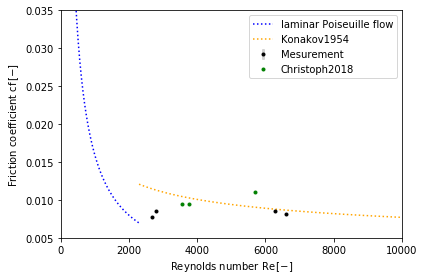

In [53]:
#plt.plot(Re_lam, Cf_lam, color='red')
plt.xlim(0,10000)
plt.ylim(0.005,0.035)
plt.plot(Re_lam, Cf_lam, color='blue',linestyle="dotted", label='laminar Poiseuille flow')
plt.plot(Re_turb, Cf_Konakov, color='orange',linestyle="dotted", label="Konakov1954")
#plt.plot(Re_turb, Cf_Petukhov, color='red',linestyle="dotted", label="Eq(8.21)")
#plt.plot(Re_turb, Cf_Blasius_a, color='green',linestyle="dotted",label='Moody diagram for smooth tube surface')
#plt.plot(Re_turb, Cf_Blasius_b, color='green',linestyle="dotted",label='Eq(8.20b)') 

plt.errorbar(2672, 0.00779, yerr=3.71E-6, fmt='.', color='black', ecolor='lightgray', elinewidth=3, capsize=1, label="Mesurement");
plt.errorbar(6617, 0.0081, yerr=3.88E-6, fmt='.', color='black', ecolor='lightgray', elinewidth=3, capsize=1)
plt.errorbar(6270, 0.0086, yerr=4.11E-6, fmt='.', color='black', ecolor='lightgray', elinewidth=3, capsize=1)
#plt.errorbar(6440, 0.0084, yerr=4.03E-6, fmt='.', color='black', ecolor='lightgray', elinewidth=3, capsize=1)
plt.errorbar(2805, 0.0086, yerr=4.12E-6, fmt='.', color='black', ecolor='lightgray', elinewidth=3, capsize=1)
#Christoph2018
plt.errorbar(3571, 0.0095, fmt='.', color='green', ecolor='lightgreen', elinewidth=3, capsize=1, label="Christoph2018")
plt.errorbar(3773, 0.00943, fmt='.', color='green', ecolor='lightgreen', elinewidth=3, capsize=1)
plt.errorbar(5686, 0.011, fmt='.', color='green', ecolor='lightgreen', elinewidth=3, capsize=1)

plt.legend()
plt.xlabel(r'Reynolds number Re$\,\mathrm{[-]}$')
plt.ylabel(r'Friction coefficient cf$\,\mathrm{[-]}$')

#OutPutFig = './re_cf_pr50_'+ timestr + 'pdf'
OutPutFig = './recf_pr50.pdf'
plt.tight_layout()
plt.savefig(OutPutFig)
print('File name:', OutPutFig)

In [54]:
Re_lam = np.linspace(1,2300,)
Re_tran = np.linspace(2300,10000,)
Re_turb = np.linspace(10000,100000,)

In [55]:
Nu_lam1 = 3.66
Nu_lam2 = 0.7
Nu_lam3 = 1.615 * (Re_lam * Pr_m * di / L)**(1/3)
Nu_lam = (Nu_lam1**3 + Nu_lam2**3 + Nu_lam3**3)**(1/3)
#print(Nu_lam)

In [56]:
xi = (1.8 * np.log10(Re_turb) - 1.5)**(-2)
Nu_turb = ((xi/8 * Re_turb * Pr_m) / (1 + 12.7 * (xi/8)**0.5 * (Pr_m**(2/3) - 1))) * (1 + (di/L)**(2/3))
#print(Nu_turb)

In [57]:
c1 = Nu_lam[49]
c2 = Nu_turb[0]
r = (Re_tran - 2300) / (10**4 - 2300)
Nu_tran = (1 - r) * c1 + r * c2
#print(r)

File name: ./renu_pr50.pdf


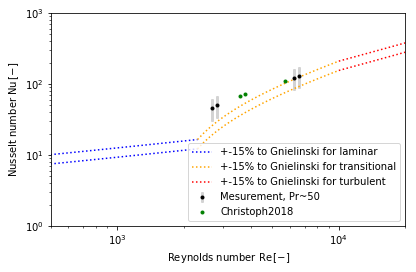

In [58]:
plt.xlim(500,20000)
plt.ylim(1,1000)

plt.loglog(Re_lam, Nu_lam * 1.15, color='blue',linestyle="dotted", label="+-15% to Gnielinski for laminar")
plt.loglog(Re_lam, Nu_lam * 0.85, color='blue',linestyle="dotted")

plt.loglog(Re_tran, Nu_tran * 1.15, color='orange',linestyle="dotted", label="+-15% to Gnielinski for transitional")
plt.loglog(Re_tran, Nu_tran * 0.85, color='orange',linestyle="dotted")

plt.loglog(Re_turb, Nu_turb * 1.15, color='red',linestyle="dotted", label="+-15% to Gnielinski for turbulent")
plt.loglog(Re_turb, Nu_turb * 0.85, color='red',linestyle="dotted")

plt.errorbar(2672, 45.35, yerr=15.27, fmt='.', color='black', ecolor='lightgray', elinewidth=3, capsize=1, label="Mesurement, Pr~50")
plt.errorbar(6617, 129.9, yerr=42.8, fmt='.', color='black', ecolor='lightgray', elinewidth=3, capsize=1);
plt.errorbar(6270, 123.1, yerr=40.59, fmt='.', color='black', ecolor='lightgray', elinewidth=3, capsize=1);
#plt.errorbar(6440, 127.53, yerr=42.34, fmt='.', color='black', ecolor='lightgray', elinewidth=3, capsize=1);
plt.errorbar(2805, 50.32, yerr=17.07, fmt='.', color='black', ecolor='lightgray', elinewidth=3, capsize=1);
#Christoph2018
plt.errorbar(3571, 68, fmt='.', color='green', ecolor='lightgreen', elinewidth=3, capsize=1, label="Christoph2018")
plt.errorbar(3773, 73, fmt='.', color='green', ecolor='lightgreen', elinewidth=3, capsize=1)
plt.errorbar(5686, 110, fmt='.', color='green', ecolor='lightgreen', elinewidth=3, capsize=1)

plt.xlabel(r'Reynolds number Re$\,\mathrm{[-]}$')
plt.ylabel(r'Nusselt number Nu$\,\mathrm{[-]}$')

#ax.legend([Nu_lam * 1.15, Nu_tran], ['A', 'B'])
plt.legend(loc='lower right')

plt.rcParams["font.size"] = 14

#OutPutFig = './re_nu_pr50_'+ timestr + 'pdf'
OutPutFig = './renu_pr50.pdf'
plt.tight_layout()
plt.savefig(OutPutFig)

print('File name:', OutPutFig)

In [59]:
def NuGnie(cf): # Fully turbulent regime ( 0.1 < Pr_b < 1000, 10^4 < Re_b < 10^6 )
    NuGnie = ((cf_M/2)*Re_m*Pr_m)/(1+12.7*(cf_M/2)**(1/2)*(Pr_m**(2/3)-1))*(Pr_m/Pr_w)**0.11 #Gnielinski(1995) Eq(4.18)
    #?????????????
    return(NuGnie)

def Nu_turb(Re): #turbulent, Ref.Gnielinski(1995)
    xi = (1.8 * np.log10(Re) - 1.5)**(-2)
    Nu_turb = ((xi/8 * Re * Pr_m) / (1 + 12.7 * (xi/8)**0.5 * (Pr_m**(2/3) - 1))) * (1 + (di/L)**(2/3))
    return(Nu_turb)

def Nu_lam(Re): #laminar, Ref.Gnielinski(2001)
    Nu_lam1 = 3.66
    Nu_lam2 = 0.7
    Nu_lam3 = 1.615 * (Re * Pr_m * di / L)**(1/3)
    Nu_lam = (Nu_lam1**3 + Nu_lam2**3 + Nu_lam3**3)**(1/3)
    return(Nu_lam)

def Nu_tran(Re): #transitional, Ref.Gnielinski(1995)
    r = (Re - 2300) / (10**4 - 2300)
    Nu_tran = (1 - r) * Nu_lam(Re) + r * Nu_turb(Re)
    return(Nu_tran)